In [1]:
import pandas as pd
from prophet import Prophet
from datetime import *
import numpy as np

In [4]:
#I will try now with a larger training set
df

,Load,ds
0,3.447,2019-12-01 00:00:00
1,3.357,2019-12-01 01:00:00
2,3.377,2019-12-01 02:00:00
3,3.488,2019-12-01 03:00:00
4,3.568,2019-12-01 04:00:00
...,...,...
24837,3.918,2022-09-30 19:00:00
24838,3.998,2022-09-30 20:00:00
24839,3.767,2022-09-30 21:00:00
24840,3.479,2022-09-30 22:00:00


In [3]:
df = pd.read_csv("prophet2.csv")
df1 = pd.to_datetime(df.loc[:,'Date'].astype(str) + ' ' + df.loc[:,'Hour'].astype(str), format = '%m/%d/%Y %H')
df.insert(3, 'ds', df1)
df = df.drop(["Hour", "Date"], axis=1)

In [12]:
#invert columns
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.rename(columns = {'Load':'y'}, inplace = True)

In [13]:
m = Prophet(yearly_seasonality=True)
m.fit(df)

D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
future = m.make_future_dataframe(periods=30000, freq ='H')
future.tail()


,ds
54835,2026-03-03 19:00:00
54836,2026-03-03 20:00:00
54837,2026-03-03 21:00:00
54838,2026-03-03 22:00:00
54839,2026-03-03 23:00:00


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\Users\Krawczyk\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
54835,2026-03-03 19:00:00,2.760259,-29.638020,35.652074
54836,2026-03-03 20:00:00,2.599297,-29.928434,35.006128
54837,2026-03-03 21:00:00,2.240261,-30.190212,35.239090
54838,2026-03-03 22:00:00,1.783980,-30.687417,34.418393
54839,2026-03-03 23:00:00,1.362391,-31.111103,33.936019


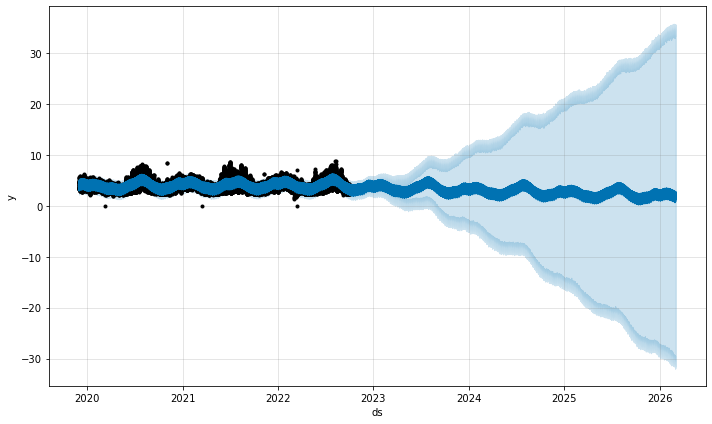

In [21]:
fig1 = m.plot(forecast)

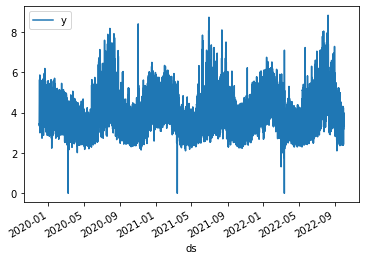

In [18]:
fig2 = df.plot("ds", "y")